# Exploratory Data Analysis

Look at the data and explore all variables with ydata.

In [83]:
import pandas as pd
import numpy as np

# import dataframes for training and testing
df_train_titanic = pd.read_csv('train.csv')
df_test_titanic = pd.read_csv('test.csv')

In [84]:
# check out the first few datapoints
df_train_titanic.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [6]:
# Create a ydata profile to explore the data
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train_titanic,title = 'Profile Report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Feature Engineering

In [85]:
# check for NaN entries
df_train_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [86]:
# replace the missing age with the mean age of the passengers, might try -1 later
age_mean = df_train_titanic.Age.mean()
df_train_titanic.Age.fillna(age_mean, inplace=True)

In [87]:
# further check out the data
df_train_titanic.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [88]:
# We ignore the name and ticket number
columns_to_drop = ['Name','Ticket']
df_train_titanic = df_train_titanic.drop(columns_to_drop,axis=1)

In [89]:
# Since most cabin entries are missing, we replace them by whether or not we know the number
df_train_titanic.Cabin = df_train_titanic.Cabin.isna()

In [12]:
df_train_titanic.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  Cabin  \
0            1         0       3    male  22.0      1      0   7.2500   True   
1            2         1       1  female  38.0      1      0  71.2833  False   
2            3         1       3  female  26.0      0      0   7.9250   True   
3            4         1       1  female  35.0      1      0  53.1000  False   
4            5         0       3    male  35.0      0      0   8.0500   True   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S

In [159]:
# We use a label encoder for the sex to convert it to numerical values
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
le_sex.fit(df_train_titanic.Sex)
df_train_titanic.Sex = le_sex.transform(df_train_titanic.Sex)

In [91]:
# We use another label encoder on Embarked after filling up the two na values with the most common value S
df_train_titanic.Embarked.fillna('S',inplace=True)
le_embarked = LabelEncoder()
le_embarked.fit(df_train_titanic.Embarked)
df_train_titanic.Embarked = le_embarked.transform(df_train_titanic.Embarked)

In [92]:
df_train_titanic.describe()

PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.647587   29.699118   
std     257.353842    0.486592    0.836071    0.477990   13.002015   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    1.000000   29.699118   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare    Embarked  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208    1.536476  
std      1.102743    0.806057   49.693429    0.791503  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400    1.000000  
50%      0.000000    0.000000   14.454200    2.000000  
75%      1.000000    0.000000   31.000000    2.000000  
max      8.000000    6.000000  512.329200    2.000000

Finally, we use a Standard Scaler to be able to use algorithms like SVM or PCA.

In [93]:
from sklearn.preprocessing import MinMaxScaler

# Use Standard Scaler on the training set
scaler = MinMaxScaler()
train_titanic = scaler.fit_transform(df_train_titanic.drop(['PassengerId','Survived'],axis=1))
df_train_titanic_scaled = pd.DataFrame(train_titanic,columns=df_train_titanic.drop(['PassengerId','Survived'],axis=1).columns)

In [94]:
df_train_titanic_scaled['PassengerId'] = df_train_titanic['PassengerId']
df_train_titanic_scaled['Survived'] = df_train_titanic['Survived']

In [19]:
df_train_titanic_scaled.head()

Pclass  Sex       Age  SibSp  Parch      Fare  Cabin  Embarked  \
0     1.0  1.0  0.271174  0.125    0.0  0.014151    1.0  1.000000   
1     0.0  0.0  0.472229  0.125    0.0  0.139136    0.0  0.333333   
2     1.0  0.0  0.321438  0.000    0.0  0.015469    1.0  1.000000   
3     0.0  0.0  0.434531  0.125    0.0  0.103644    0.0  1.000000   
4     1.0  1.0  0.434531  0.000    0.0  0.015713    1.0  1.000000   

   PassengerId  Survived  
0            1         0  
1            2         1  
2            3         1  
3            4         1  
4            5         0

## Model Building

To build a good model and cross validate the model, we split the training data into training and validation data.

In [137]:
from sklearn.model_selection import train_test_split

# Split data into train and validation data
X_train, X_val, y_train, y_val = train_test_split(df_train_titanic_scaled.drop('Survived',axis=1), df_train_titanic_scaled['Survived'], test_size=0.1, random_state=0)

For this project, we use a Decision Tree. In particular, we use project to understand the process of pruning.

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Fitting and predicting with a Decision Tree
clf_tree = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
pred_tree = clf_tree.predict(X_val)

# Print the accuracy of the Decision Tree on the validation data
print('Accuracy score of the Decision Tree: ',accuracy_score(pred_tree,y_val))

Accuracy score of the Decision Tree:  0.7333333333333333


To gain an understanding of the Decision Tree, we plot the decision tree.

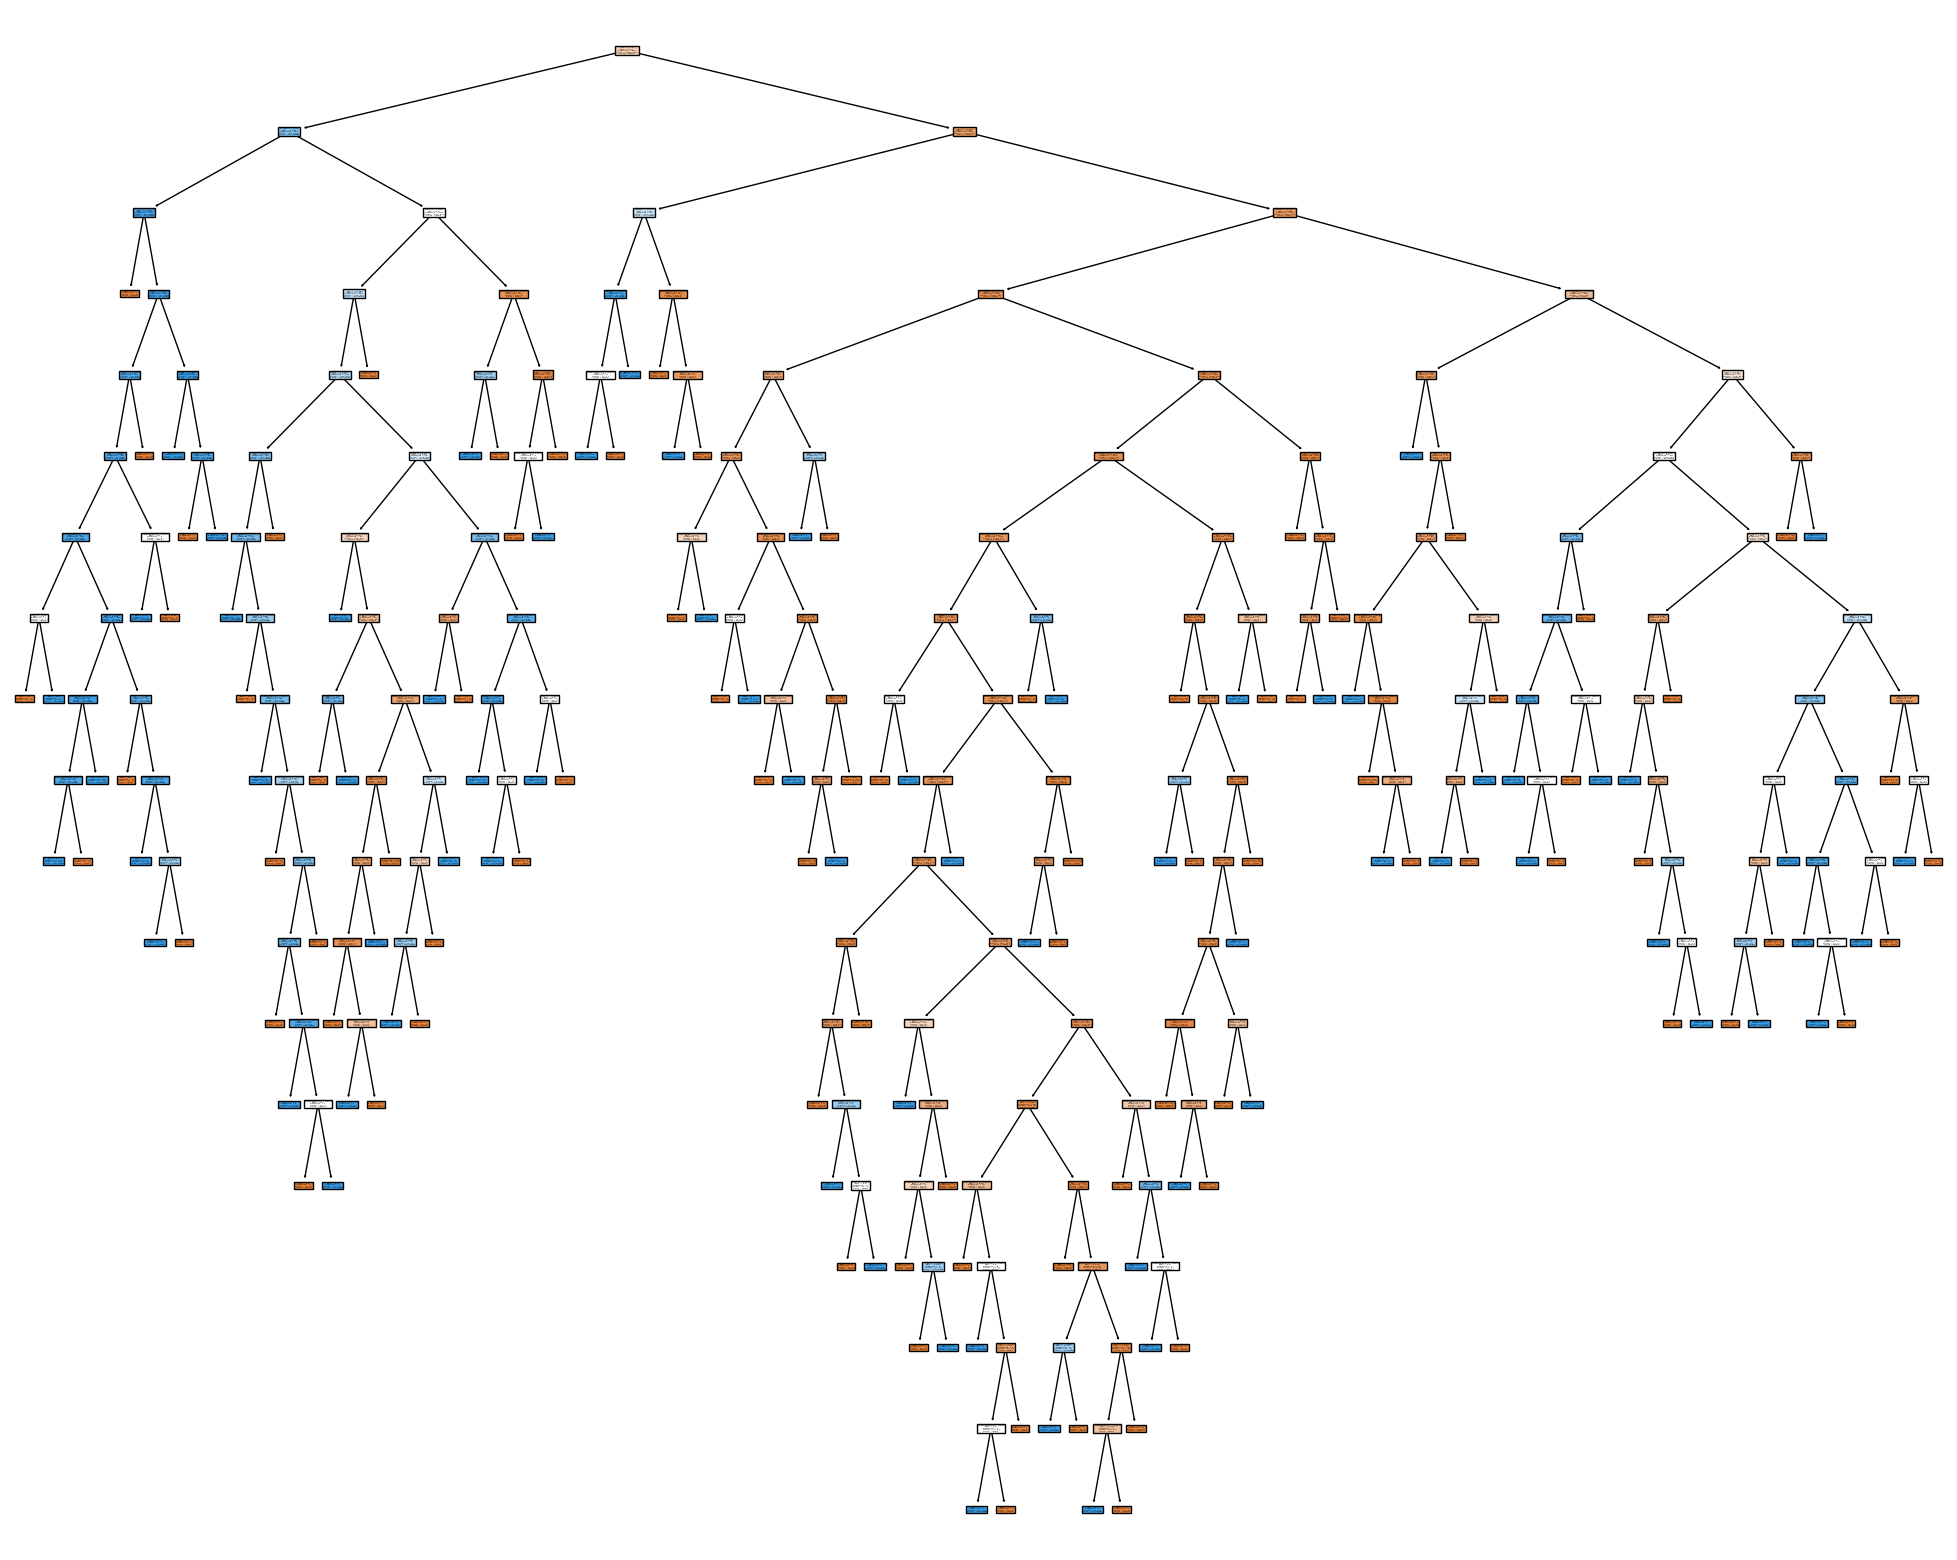

In [140]:
import matplotlib.pyplot as plt
from sklearn import tree

%matplotlib inline
# We plot the Decision Tree
target_names = ['Died', 'Survived']
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_tree,
                   feature_names=X_train.columns,
                   class_names=target_names,
                   filled=True)
plt.show()

This decision tree is very complicated and most likely overfits the data. So, we use pruning to get an easier decision tree that does not overfit as much.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

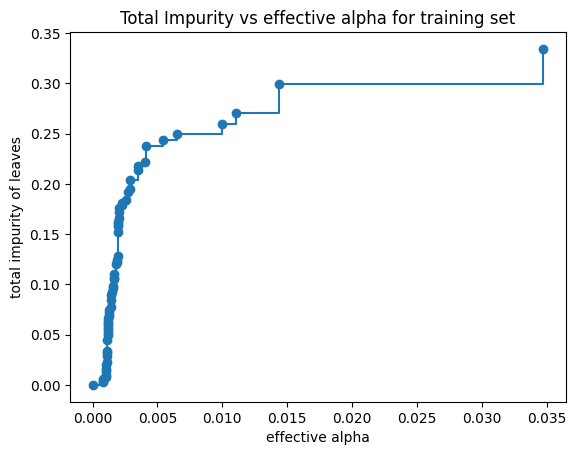

In [141]:
# We prune the decision tree for all possible cost complexity values (ccp_alpha)
path = clf_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# To get an overview, we plot the impurity of the leaves vs the ccp_alpha value
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [142]:
# From all the pruned decision trees, we select the one with the best accuracy on the validation data
clfs = []
max_accuracy = 0
best_ccp_alpha = -1
# Going through all ccp alpha values
for ccp_alpha in ccp_alphas:
    # We create a decision tree, fit the tree and predict the validation data
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    pred = clf.predict(X_val)
    # With that we calculate the accuracy
    accuracy = accuracy_score(pred,y_val)
    # Find the maximum accuracy and the best decision tree
    if accuracy >= max_accuracy:
      max_accuracy = accuracy
      best_ccp_alpha = ccp_alpha
      nodes = clf.tree_.node_count
      clf_tree_pruned = clf

# Print out the values for the best decision tree
print('For cc_alpha = {}, the pruned decision tree with {} nodes has the best accuracy score: {}'.format(
    best_ccp_alpha, nodes, max_accuracy
))

For cc_alpha = 0.009961215297841053, the pruned decision tree with 11 nodes has the best accuracy score: 0.8444444444444444


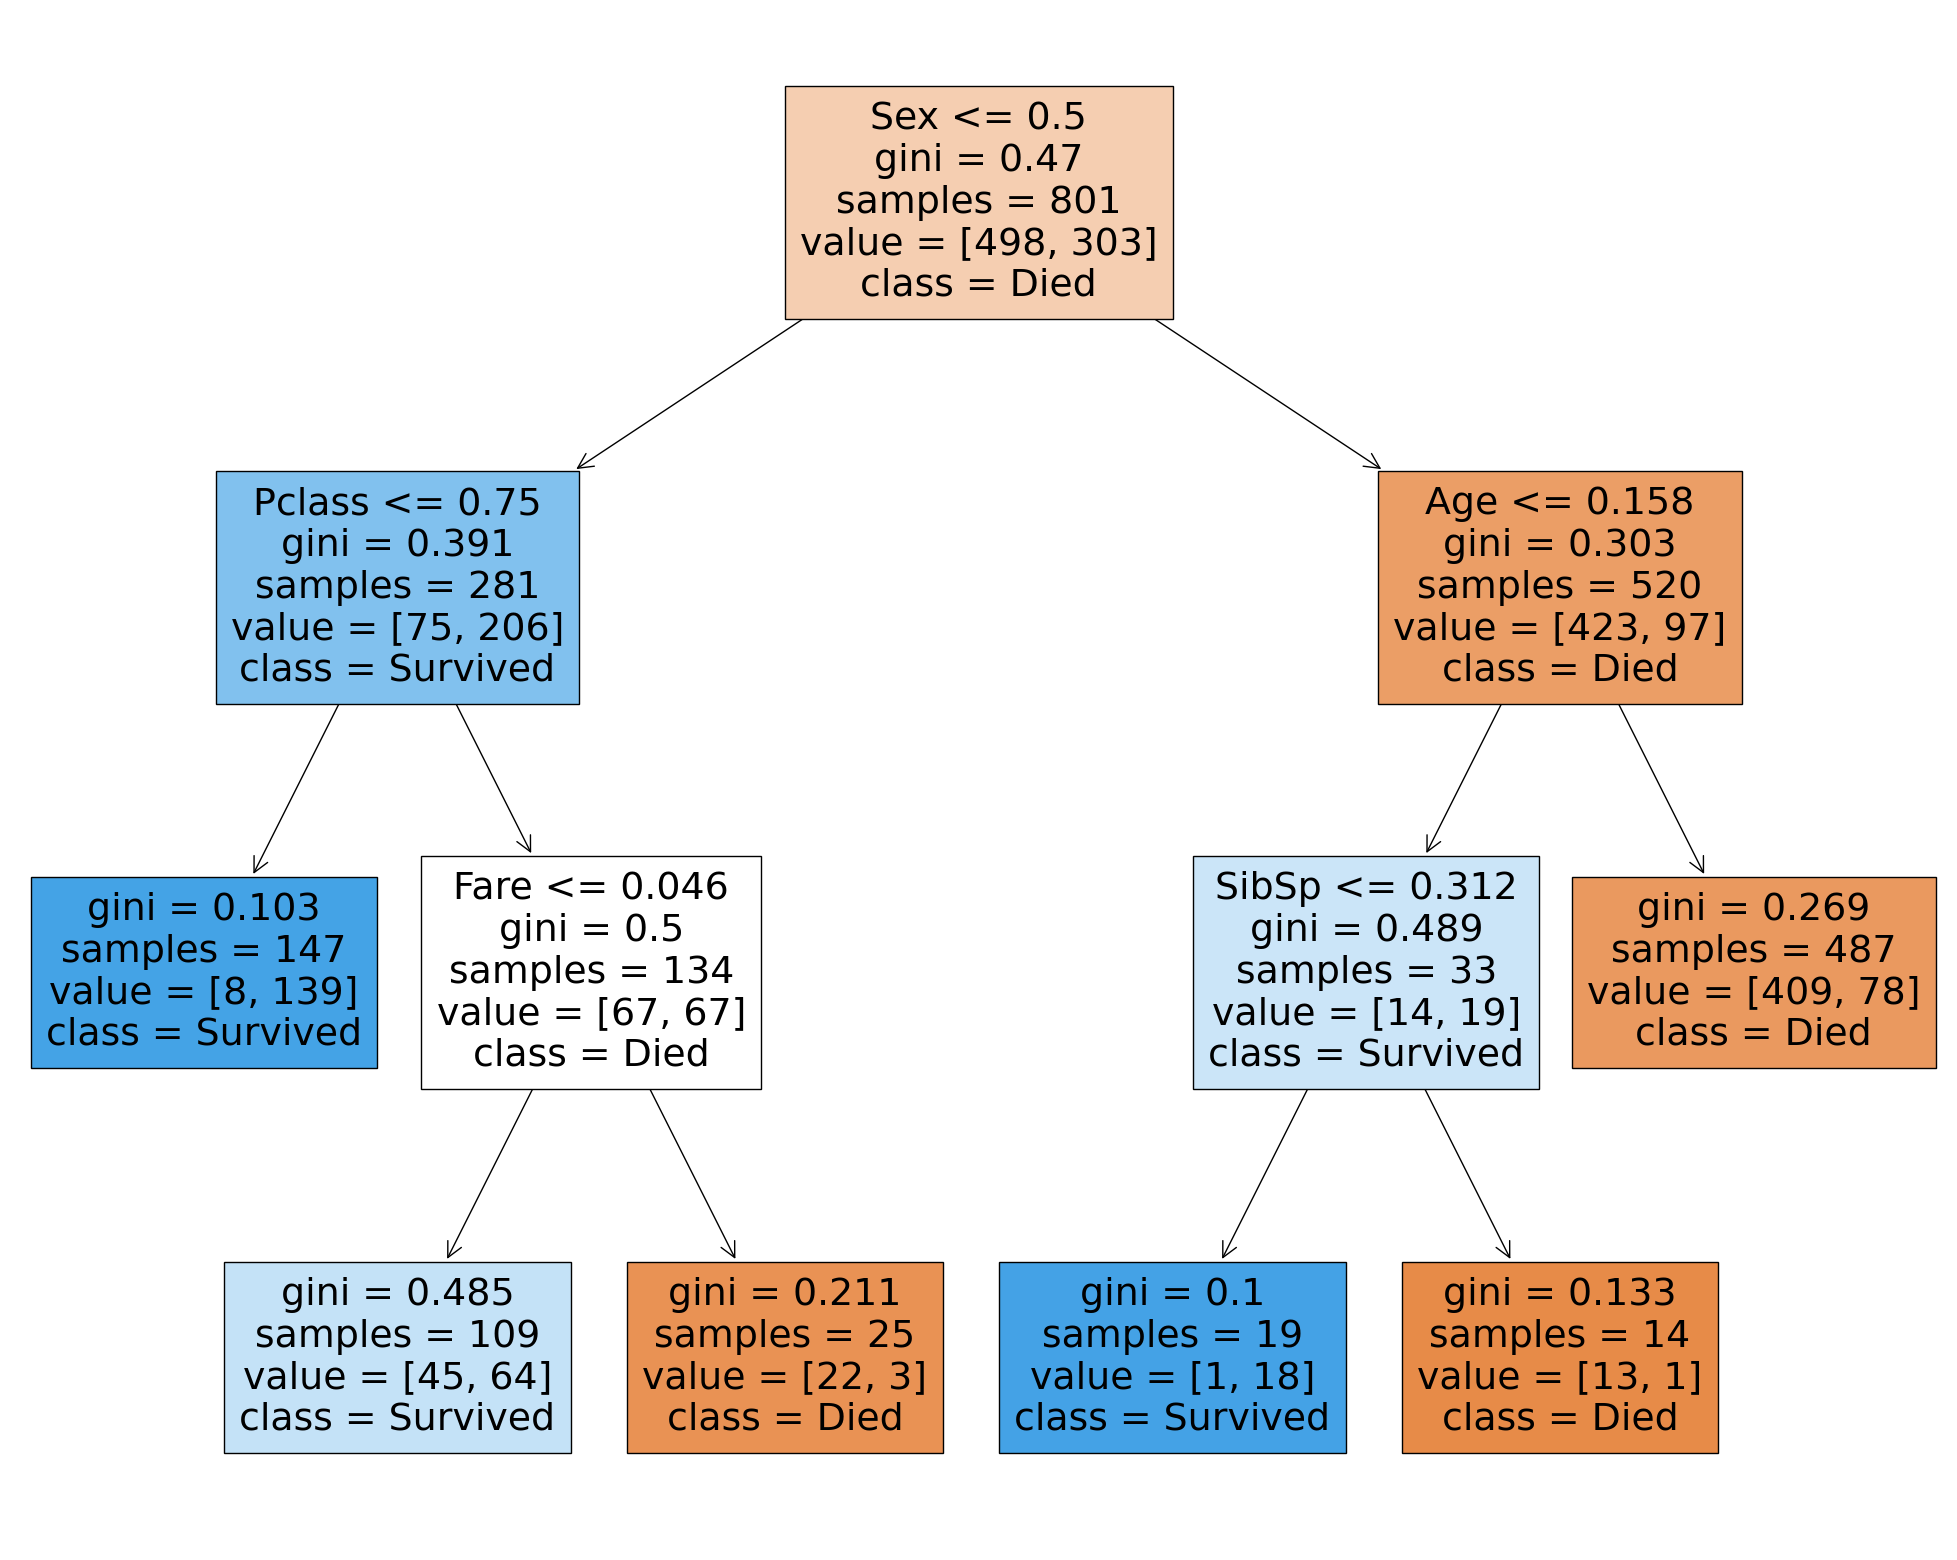

In [143]:
# Plot the best pruned decision tree
target_names = ['Died', 'Survived']
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_tree_pruned,
                   feature_names=X_train.columns,
                   class_names=target_names,
                   filled=True)

Note that this decision tree gives the accuracy of 0.7799 on Kaggle. This model emphasizes the important of gender for the prediction. Following gender, the class (for women) and age (for men) are the most important predictors. 

# Test data transformation

Similarly to the training data, we need to transform the test data.



In [124]:
# We check the test data for nan values
df_test_titanic.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [125]:
# replace the missing age with the mean age of the passengers
df_test_titanic.Age.fillna(age_mean, inplace=True)

# Ignore the Name and Ticket Number
columns_to_drop = ['Name','Ticket']
df_test_titanic = df_test_titanic.drop(columns_to_drop,axis=1)

In [126]:
# Since most cabin entries are missing, we replace them by whether or not we know the number
df_test_titanic.Cabin = df_test_titanic.Cabin.isna()

In [127]:
# We transform the data on male or female to numerical data
df_test_titanic.Sex = le_sex.transform(df_test_titanic.Sex)

In [128]:
# Similarly for the data whether they embarked, note that we don't have any NaN here. So we can ignore that step.
df_test_titanic.Embarked = le_embarked.transform(df_test_titanic.Embarked)

In [129]:
# Since we have an additional NaN here for the fare, we use the mean as a placeholder.
fare_mean = df_train_titanic.Fare.mean()
df_test_titanic.Fare.fillna(fare_mean,inplace=True)

In [130]:
# We scale the data with the min max scaler from before
test_titanic = scaler.transform(df_test_titanic.drop('PassengerId',axis=1))
df_test_titanic_scaled = pd.DataFrame(test_titanic,columns=df_test_titanic.drop('PassengerId',axis=1).columns)

In [131]:
# We add the passengerId's again
df_test_titanic_scaled['PassengerId'] = df_test_titanic['PassengerId']

# Prediction on the test data

Finally, we predict the values on the test data and export the predictions for submission to the Kaggle competition.

In [147]:
# We check the test data for nan values
df_test_titanic.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [150]:
# We use the pruned decision tree model to make a prediction of the data
test_predictions_tree = clf_tree_pruned.predict(df_test_titanic_scaled)

In [151]:
prediction_df = pd.DataFrame({
    'PassengerId': df_test_titanic.PassengerId,
    'Survived': test_predictions_tree
})

# Save the DataFrame to a CSV file on your local machine
file_path = 'predictions_titanic_tree.csv'  # specify your desired path and filename
prediction_df.to_csv(file_path, index=False)

print(f"Predictions saved to {file_path}")

Predictions saved to predictions_titanic_tree.csv
